In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
ruta= "C:/Users/DANI/Downloads/MALL CUSTOMERS FILE/Mall_Customers.csv"

In [3]:
datos = pd.read_csv(ruta)

In [4]:
print("Dimensiones del dataset:", datos.shape)
print("\nPrimeras 3 filas:")
print(datos.head(5))

Dimensiones del dataset: (200, 5)

Primeras 3 filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
datos_limpios = datos.drop('CustomerID', axis=1)

In [11]:
print("Nuevas columnas:", datos_limpios.columns.tolist())

Nuevas columnas: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [13]:
print("Valores faltantes por columna:")
print(datos_limpios.isnull().sum())

Valores faltantes por columna:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
print("Número de filas con datos duplicadas:", datos_limpios.duplicated().sum())

Número de filas con datos duplicadas: 0


In [17]:
datos_limpios = datos.drop('CustomerID', axis=1)
datos_limpios['Gender'] = datos_limpios['Gender'].map({'Female': 1, 'Male': 0})

In [19]:
variables_numericas = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']
X = datos_limpios[variables_numericas]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


print("Forma de X_scaled:", X_scaled.shape)

Forma de X_scaled: (200, 4)


In [21]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe().round(2))

       Annual Income (k$)  Spending Score (1-100)     Age  Gender
count              200.00                  200.00  200.00  200.00
mean                -0.00                   -0.00   -0.00   -0.00
std                  1.00                    1.00    1.00    1.00
min                 -1.74                   -1.91   -1.50   -1.13
25%                 -0.73                   -0.60   -0.72   -1.13
50%                  0.04                   -0.01   -0.20    0.89
75%                  0.67                    0.89    0.73    0.89
max                  2.92                    1.89    2.24    0.89


In [23]:
print("Desviación estándar:", X_scaled.std(axis=0).round(2)) 

Desviación estándar: [1. 1. 1. 1.]


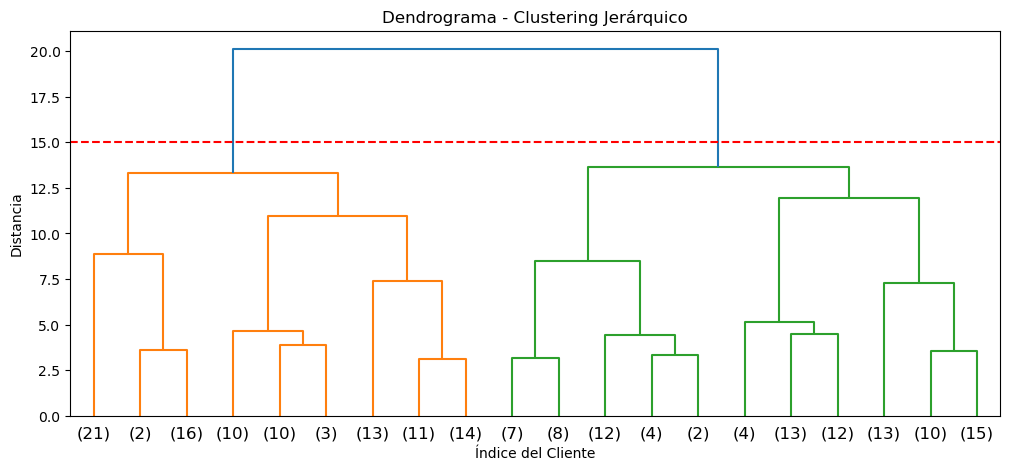

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


Z = linkage(X_scaled, method='ward')

# graficamos el dendograma.
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índice del Cliente')
plt.ylabel('Distancia')
plt.axhline(y=15, color='r', linestyle='--')  # Línea de corte sugerida
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

# Para scikit-learn >= 1.4:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  # ¡Usa 'metric' en lugar de 'affinity'!
datos_limpios['Cluster_HC'] = hc.fit_predict(X_scaled)

# Ver distribución de clusters
print(datos_limpios['Cluster_HC'].value_counts())

Cluster_HC
1    100
0    100
Name: count, dtype: int64


In [29]:
import sklearn
print(sklearn.__version__)

1.5.1


In [31]:
datos = pd.read_csv(r"C:\Users\DANI\Downloads\MALL CUSTOMERS FILE\Mall_Customers.csv")

# 2. Limpieza básica
datos_limpios = datos.drop('CustomerID', axis=1)
datos_limpios['Gender'] = datos_limpios['Gender'].map({'Female': 1, 'Male': 0})

# 3. Seleccionar variables numéricas
X = datos_limpios[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]  # Ajusta según necesites

# 4. Escalar (¡Esto crea X_scaled!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("¡X_scaled listo! Dimensiones:", X_scaled.shape)

¡X_scaled listo! Dimensiones: (200, 3)


In [33]:
# Rango de clusters a probar
rango_k = range(2, 6)  # Desde 2 hasta 5 clusters

for k in rango_k:
    # 1. Configurar modelo
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    
    # 2. Entrenar y predecir clusters
    labels = hc.fit_predict(X_scaled)  # ¡Ahora X_scaled existe!
    
    # 3. Evaluar
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}: Silhouette Score = {score:.3f}")

K=2: Silhouette Score = 0.318
K=3: Silhouette Score = 0.321
K=4: Silhouette Score = 0.361
K=5: Silhouette Score = 0.390


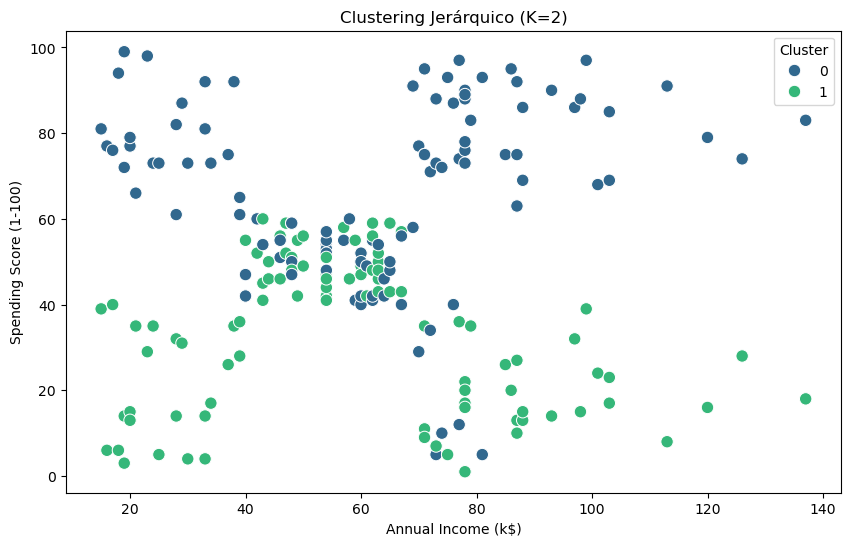

In [35]:
# Elegir el mejor K (ej: K=2 según scores)
hc_final = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
datos_limpios['Cluster'] = hc_final.fit_predict(X_scaled)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_limpios,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=80
)
plt.title('Clustering Jerárquico (K=2)')
plt.show()

In [37]:
print("¿X_scaled existe?", 'X_scaled' in locals())  

¿X_scaled existe? True


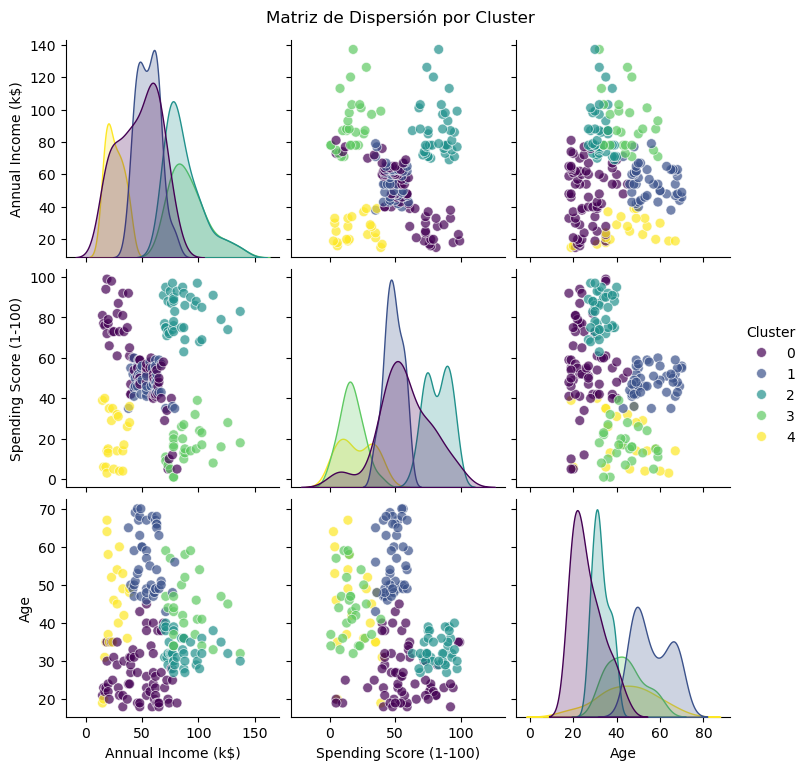

In [39]:
# añadimos la columna cluster la las demas
datos_limpios['Cluster'] = hc.fit_predict(X_scaled)

# Pair Plot (solo variables numéricas)
sns.pairplot(
    datos_limpios,
    vars=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'],
    hue='Cluster',
    palette='viridis',
    plot_kws={'alpha': 0.7, 's': 50}
)
plt.suptitle('Matriz de Dispersión por Cluster', y=1.02)
plt.show()

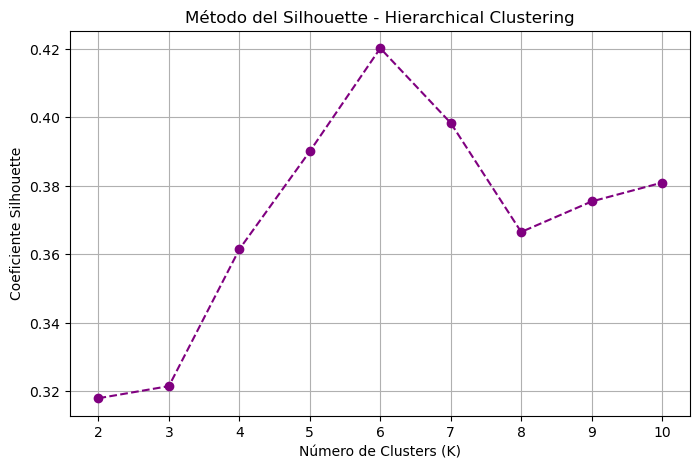

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Gráfica de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Método del Silhouette - Hierarchical Clustering')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente Silhouette')
plt.grid(True)
plt.show()


In [46]:

from sklearn.preprocessing import StandardScaler

# Selección de columnas de interés
X = datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ver los primeros registros escalados
print(X_scaled[:5])


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


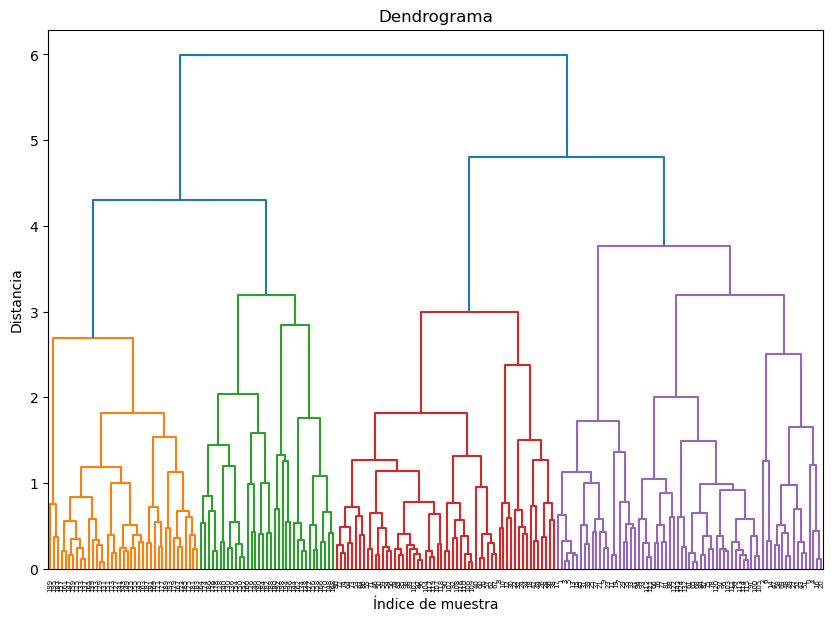

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        4  
2        0  
3        4  
4        0  


In [54]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

# Realizar el clustering jerárquico con el número de clusters que decidas
n_clusters = 5  # Usamos 5 clusters como ejemplo
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')

# Predecir las etiquetas de los clusters
labels = hierarchical.fit_predict(X_scaled)

# Agregar las etiquetas de los clusters al dataframe original para ver cómo quedaron
datos['Cluster'] = labels

# Ver los primeros registros con las etiquetas de clusters
print(datos.head())


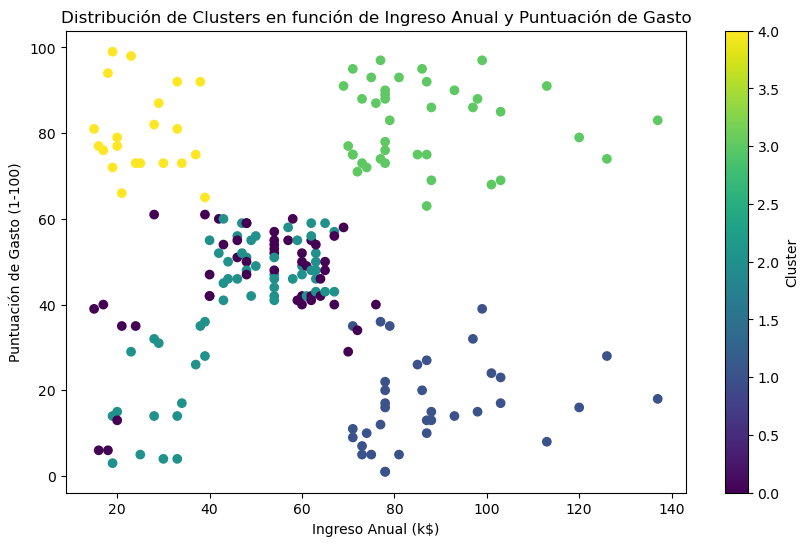

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'], c=datos['Cluster'], cmap='viridis')
plt.title('Distribución de Clusters en función de Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()


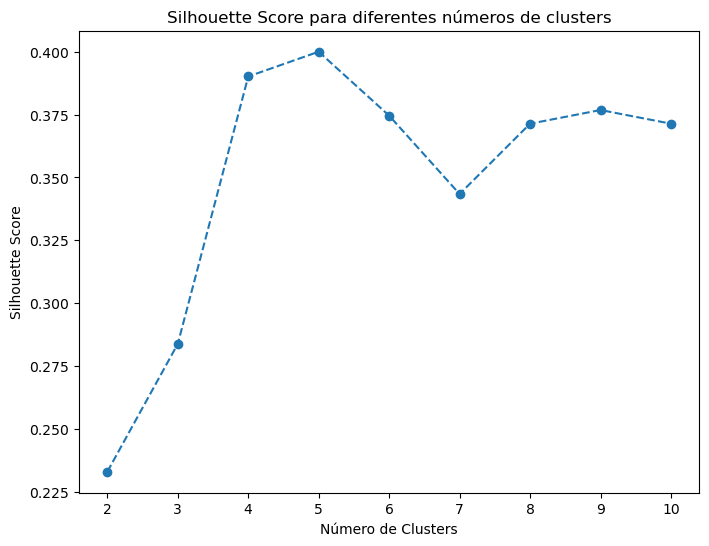

El número óptimo de clusters según el Silhouette Score es: 5


In [58]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista para almacenar los silhouette scores
sil_scores = []

# Probar diferentes valores de k (número de cluster)
range_n_clusters = list(range(2, 11))  

for n_clusters in range_n_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', distance_threshold=None)
    labels = hierarchical.fit_predict(X_scaled)  # Predecir las etiquetas de los clusters
    score = silhouette_score(X_scaled, labels)  # Calcular el silhouette score
    sil_scores.append(score)

# Graficar el silhouette score para cada número de clusters cunpliendo la sugerencia de la profe 
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Encontrar el número de clusters con el mejor silhouette score
best_n_clusters = range_n_clusters[sil_scores.index(max(sil_scores))]
print(f'El número óptimo de clusters según el Silhouette Score es: {best_n_clusters}')


In [60]:
# Entrenar el modelo con el número óptimo de clusters en este caso es 5 que fue el numero que encontra oms en la grafica anterior 
hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='complete', distance_threshold=None)
labels = hierarchical.fit_predict(X_scaled)

# Agregar las etiquetas de los clusters al dataframe
datos['Cluster'] = labels

# Visualizar los primeros registros con los clusters asignados
print(datos.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        4  
2        0  
3        4  
4        0  


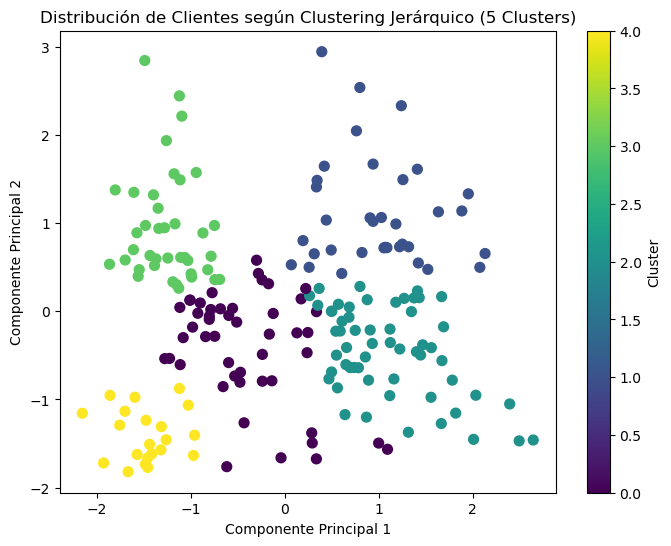

In [62]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Distribución de Clientes según Clustering Jerárquico (5 Clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()
